In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb 
# %matplotlib inline # will make your plot outputs appear and be stored within the notebook.

In [3]:
z= 70  
s= "*"  # used for a better vizualization between each print

ds = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/repaso/EDA/datos_credito_alemania.csv") #loading the dataset as a dataframe

print("shape: "+ s*z)
print(ds.shape) # N of row(samples) and columns(features) in the dataset (ds)

print("information: "+s*z)
# print(ds.stypes) #we can use also this to see the type of data  
print(ds.info())  

print("statistics: "+s*z)
print(ds.describe()) # statics summary of ds, just include numeric variables 

print("shape after clean Null values: "+s*z)
print(ds.dropna().shape) # shape of data if we delete the rows with a null value 

print("fast view of 5 samples: "+s*z)
ds.head() # shows 5 or more samples of ds 

shape: **********************************************************************
(1062, 11)
information: **********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1061 non-null   float64
 1   Age               1058 non-null   float64
 2   Sex               1052 non-null   object 
 3   Job               1055 non-null   float64
 4   Housing           1052 non-null   object 
 5   Saving accounts   862 non-null    object 
 6   Checking account  635 non-null    object 
 7   Credit amount     1055 non-null   float64
 8   Duration          1056 non-null   float64
 9   Purpose           1051 non-null   object 
 10  Risk              1046 non-null   object 
dtypes: float64(5), object(6)
memory usage: 91.4+ KB
None
statistics: ***************************************

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0.0,67.0,male,2.0,own,NaN,little,1169.0,6.0,radio/TV,good
1,1.0,22.0,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,2.0,49.0,male,1.0,own,little,NaN,2096.0,12.0,education,good
3,3.0,45.0,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,4.0,53.0,male,2.0,free,little,little,4870.0,24.0,car,bad


# visualization 

si colocamos un punto y coma despues de un plot evitamos que nos salga un mensaje en nuestro output: 

muestra.plot(kind = 'bar'); # Observa que hemos añadido ;


## histogram 
In statistics, kernel density estimation (KDE) is a non-parametric way 
to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.


i created a piece of code to grafic an histogram for each feature whose have a  continous and discret numerical data (for float64 values)
piece of code token from: "3.2 using CNN to classify horses and humans.ipynb"


learn to put a graph on the top of another:

https://stackoverflow.com/questions/39987071/plotting-a-dataframe-as-both-a-hist-and-kde-on-the-same-plot

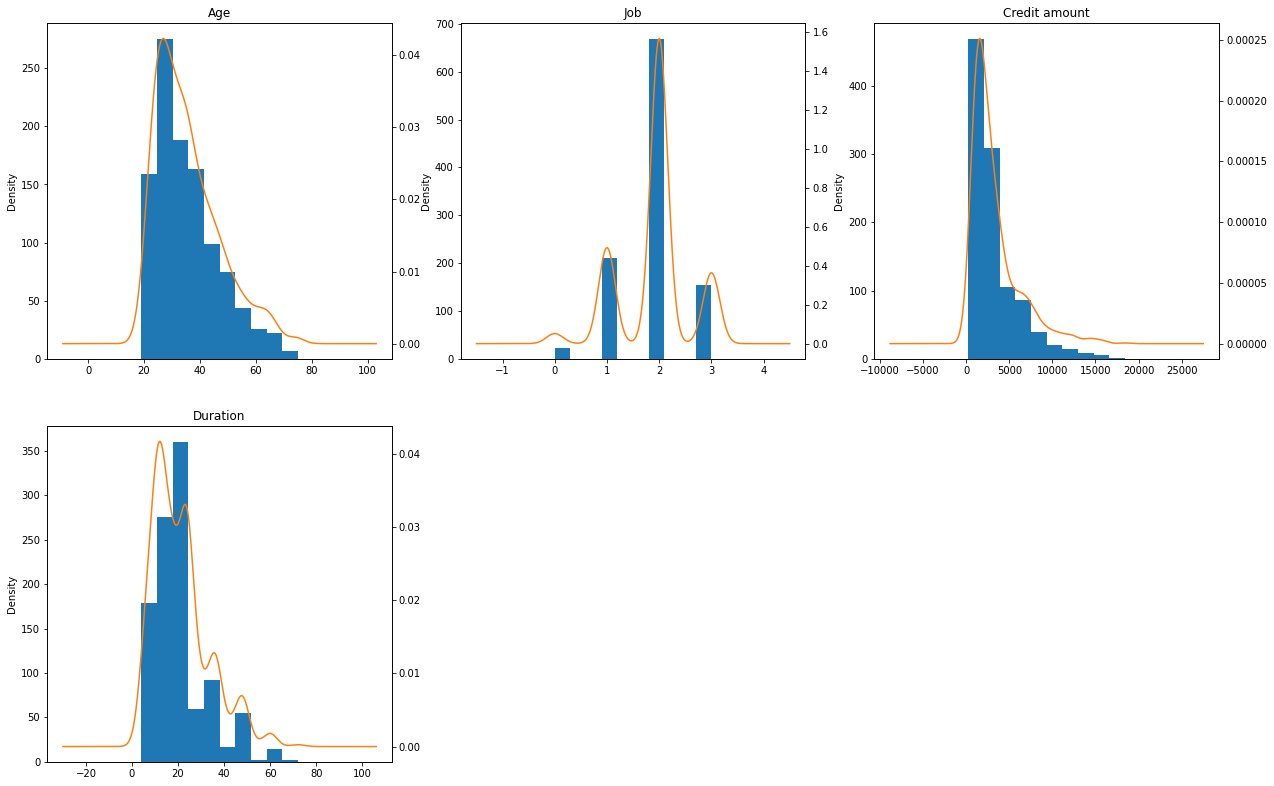

In [4]:
nrows, ncols = 3, 3
size_g = 7 # define the size in inchs for each image 
grafics = list(ds.columns)

fig = plt.gcf() 
fig.set_size_inches(ncols * size_g, nrows * size_g) # the size of the whole matrix where the graphs will be put on 
xn=1
for i, g in enumerate(grafics): # i != 0 is to avoid the first column "unamed 0"
  if ds.dtypes[i] == np.float64 and i != 0 : # will check  the type of data of each column looking for just the numeric type
    sp = plt.subplot(nrows, ncols, xn) #(num_of_columns_in _matrix, '' rows, index_in the matrix )
    ax = ds[g].plot(kind="hist") # use the dataframe plot method 
    ds[g].plot(kind="kde", ax=ax, secondary_y=True) # add on the first chart an kde chart
    plt.title(g)
    xn+=1
plt.show()

## boxplot



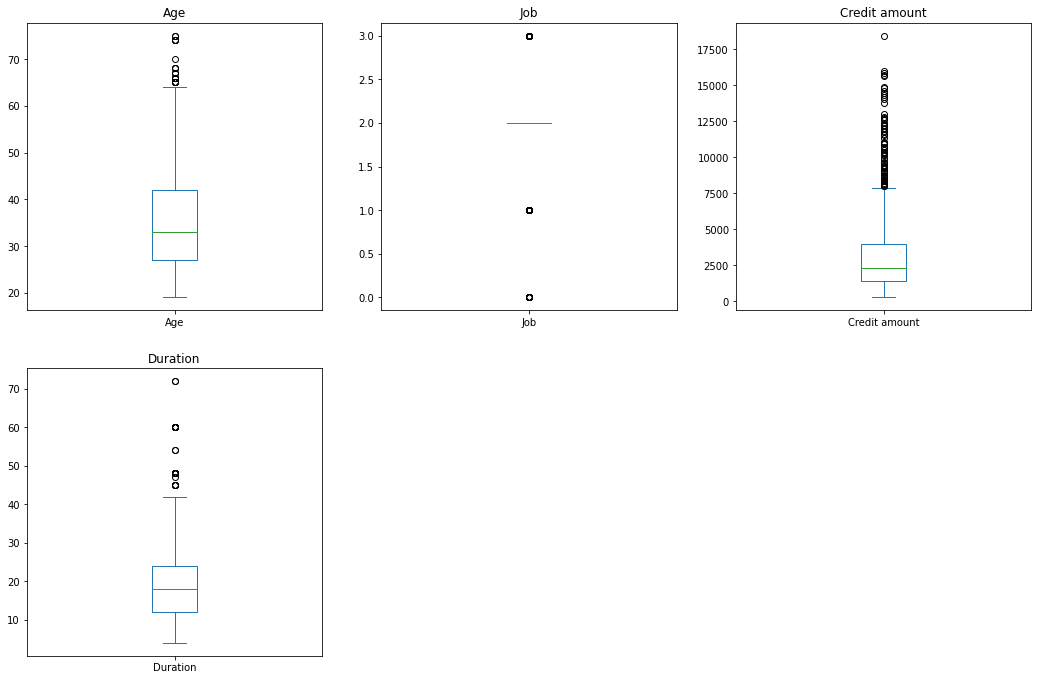

In [5]:
# using the magic of code we recycle the lines we used in the last cell 
nrows, ncols = 3, 3
size_g = 6 
grafics = list(ds.columns)

fig = plt.gcf() 
fig.set_size_inches(ncols * size_g, nrows * size_g) 
xn=1
for i, g in enumerate(grafics):
  if ds.dtypes[i] == np.float64 and i != 0:
    sp = plt.subplot(nrows, ncols, xn)
    ds[g].plot.box(); # just change the type of graphs 
    plt.title(g)
    xn+=1
plt.show()

# Bar graphs

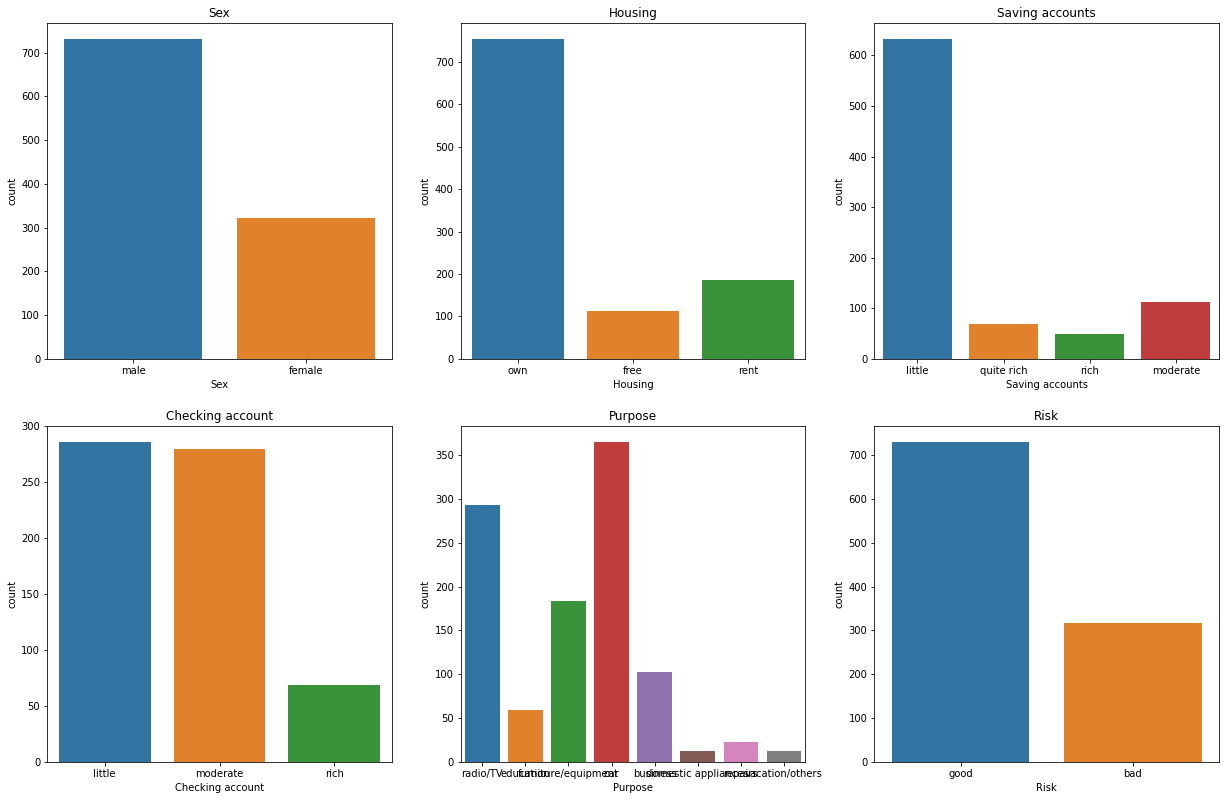

In [6]:
# again recycle the lines we used in the last cell 
nrows, ncols = 3, 3
size_g = 7
grafics = list(ds.columns)

fig = plt.gcf() 
fig.set_size_inches(ncols * size_g, nrows * size_g) 
xn=1
for i, g in enumerate(grafics):
  if ds.dtypes[i] != np.float64 and i != 0:
    sp = plt.subplot(nrows, ncols, xn)
    sb.countplot(x=g ,data=ds); # just change the type of graphs 
    plt.title(g);
    xn+=1
plt.show()

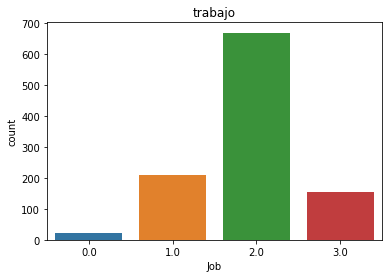

In [7]:
sb.countplot(x="Job" ,data=ds);
plt.title("trabajo");
plt.show()

##correlacion de variables 
Pandas dataframe.corr()se usa para encontrar la correlación por pares de todas las columnas en el marco de datos.
regresara un un dataframe de la siguiente forma :
![img](https://media.geeksforgeeks.org/wp-content/uploads/1-447.png)


este nuevo dataframe nos servira para imprimir un mapa de caracterisitcas. 
podemos usardierentes metodos y numero de datos para la correlaicon : df.corr(method ='kendall', min_periods= ) 

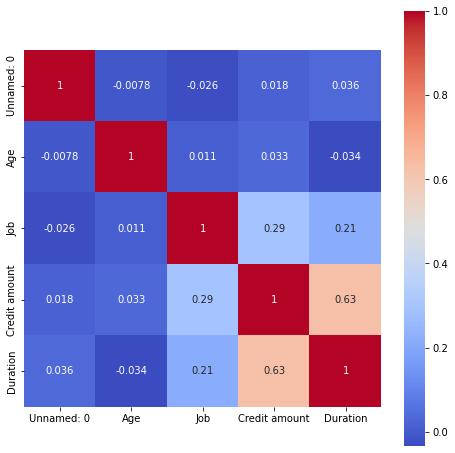

In [8]:
from numpy.core.fromnumeric import size
# Grafica de correlacion de variables 
plt.figure(figsize=(8,8)) #  plot size in inchs X inchs 
sb.heatmap(ds.corr(), annot=True, square=True, cmap='coolwarm') #annot = labels in each intersaction 
plt.show()


## correlacion de variables 
Cuando se evalúa la relación entres dos variables, es importante determinar cómo se relacionan las variables. Las relaciones lineales son muy comunes, pero las variables también pueden tener una relación no lineal o monótona ( las variables tienden a moverse en la misma dirección relativa, pero no necesariamente a un ritmo constante), como se muestra a continuación. También es posible que no haya relación entre las variables. Usted debería comenzar por crear una gráfica de dispersión de las variables para evaluar la relación.
aunque existen indices de correlacion siempre es recomendado plotear las variables para ver visualmente la relacion. 

![texto del vínculo](https://www.redalyc.org/journal/3442/344263272014/344263272014_gf2.png)

## Correlación lineal
La correlación lineal es un método estadístico que permite cuantificar la relación lineal existente entre dos variables. Existen varios estadísticos, llamados coeficientes de correlación lineal, desarrollados con el objetivo de medir este tipo de asociación, algunos de los más empleados son Pearson, Spearman y Kendall.

Con frecuencia, los estudios de correlación lineal preceden a análisis más complejos, como la creación de modelos de regresión. Primero, se analiza si las variables están correlacionadas y, en caso de estarlo, se procede a generar modelos.


Desde el punto de vista práctico, las principales diferencias entre estos tres coeficientes son:

La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.
[tver mas informacion](https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html)

[ver ejercicio con varios majeso de arrays](https://programmerclick.com/article/18381998522/)



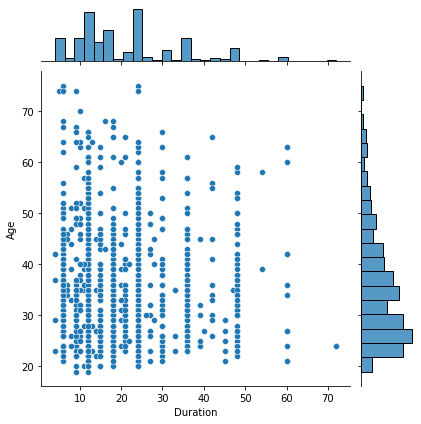

In [9]:
# plotear con plt
"""fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=ds.Duration, y=ds["Credit amount"], alpha= 0.5)
ax.set_xlabel('Altura')
ax.set_ylabel('Peso');"""

sb.jointplot(x='Duration',y='Age',data=ds ,kind='scatter'); 

# watch https://seaborn.pydata.org/generated/seaborn.jointplot.html

# grafica de barras apiladas


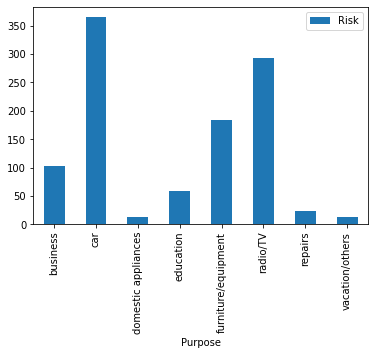

In [10]:

def m_f2(colu): # groupby agrupara todos los datos de risk que pertenezcan a una categoria de Purpose y les aplicara una funcion agg
  return len(colu)
riesgo = pd.DataFrame(ds.groupby("Purpose")["Risk"].agg(m_f2))
ax = riesgo.plot.bar()

                 Bad  Good
Saving accounts           
little           225   401
moderate          36    72
quite rich        12    54
rich               6    44


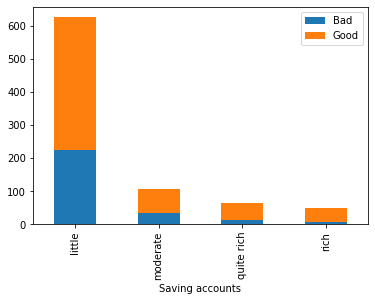

In [11]:
def m_f(colu):
  colu = pd.DataFrame(colu)
  colu = colu[colu.Risk == "bad"]
  return len(colu)
  
bad = pd.DataFrame(ds.groupby("Saving accounts")["Risk"].agg(m_f))

def m_f(colu):
  colu = pd.DataFrame(colu)
  colu = colu[colu.Risk == "good"]
  return len(colu)

bad["Good"]= pd.DataFrame(ds.groupby("Saving accounts")["Risk"].agg(m_f))
bad = bad.rename(columns={"Risk":"Bad"})
print(bad)
bad.plot.bar(stacked=True);

## boxplot bivariado


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


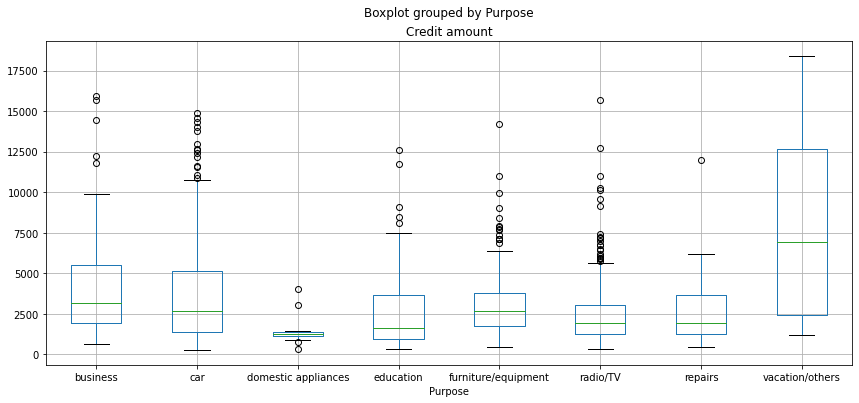

In [12]:
ds.boxplot(column = "Credit amount", by="Purpose", figsize=(14,6)) 
plt.show()

## preparacion de datos 
### Transformacion de variables 
como manejar los diccionarios
[diccionarios ´python ](https://jarroba.com/diccionario-python-ejemplos/)

In [83]:
from genericpath import exists
# podemos usar el metodo quantile para calcular los cuantiles 
print(ds["Credit amount"].quantile([.25,.5,.75]))
# recordemos que la forma de leer estos datos es "el 75% de los datos se encuentran por debajo del valor 3984.5"
# teniendo esta nomenclatura en cuenta podemos pedir el calculo para cualquier porcentaje 
print(ds["Credit amount"].quantile([0.925]))
print("-"*50)

# create a list with the column name with outliers values 
features = list(ds.columns)
list_outliers = []
list_exception=["Job"]
for i, feature in enumerate(features):
  if ds.dtypes[i] == np.float64 and i != 0 and not feature in list_exception: # created a list of feature with exceptions 
    list_outliers.append(feature)
print(list_outliers)
    

# ahora basados en la boxplot vamos a arreglar los outliers, metiendolos dentro de los bigotes
def outliers(ds, list_outliers):
  d_whis = {}
  for feature in list_outliers:
    size = len(ds[feature])
    #  top whisker = p75 + (1.5 * RIC); RIX = p75-p25
    RIC = list(ds[feature].quantile([.75]))[0] - list(ds[feature].quantile([.25]))[0]
    t_whis = list(ds[feature].quantile([.75]))[0] + (1.5 * RIC)

    # using subsetting for calc the number of outliers
    outlier_df = ds[ds[feature] > t_whis]
    o_n = len(outlier_df)
    print("total data: "+ str(size) + " we have " + str(o_n) + " outliers of '"+ feature + "' is going to be change by the value : " + str(t_whis))
    
    d_whis.setdefault(feature, t_whis) # add to the dic 
  return d_whis

whis_values = outliers(ds, list_outliers)
print("diccionary with the top whisker")
print(whis_values)

# now we use the dic to change the value of outliers by a value under the top whisker
for k,v in whis_values.items():
  print(k,v)
  for x in range (0,len(ds)):
    if ds[k][x] > v:
      ds[k][x] = v     

import warnings
warnings.filterwarnings('ignore') # dont show the warnings

0.25    1364.0
0.50    2320.0
0.75    3984.5
Name: Credit amount, dtype: float64
0.925    7811.45
Name: Credit amount, dtype: float64
--------------------------------------------------
['Age', 'Credit amount', 'Duration']
total data: 1062 we have 0 outliers of 'Age' is going to be change by the value : 64.5
total data: 1062 we have 0 outliers of 'Credit amount' is going to be change by the value : 7915.25
total data: 1062 we have 0 outliers of 'Duration' is going to be change by the value : 42.0
diccionary with the top whisker
{'Age': 64.5, 'Credit amount': 7915.25, 'Duration': 42.0}
Age 64.5
Credit amount 7915.25
Duration 42.0


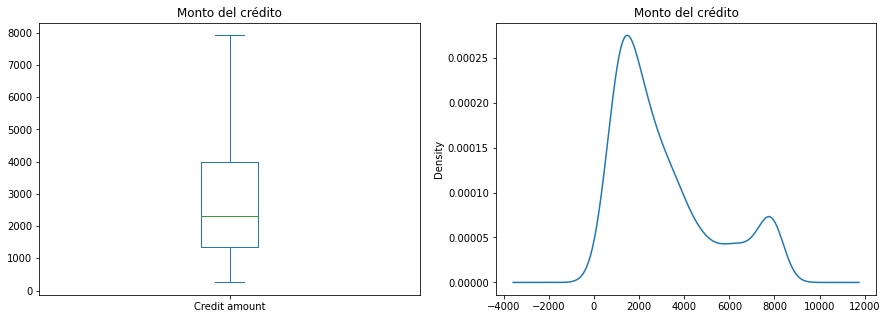

In [87]:
plt.figure(figsize=(15,5))
      
plt.subplot(121)
ds['Credit amount'].plot.box();
plt.title("Monto del crédito");

plt.subplot(122)
ds['Credit amount'].plot.kde();
plt.title("Monto del crédito");
# in the boxplot we can see ho we correct the outliers of credit amount, in the kde we see a second hill in 7915.25 where the outliers were changed 

## drop duplicates values in index (eliminar valores duplicados)



In [104]:
dup = list(ds["Unnamed: 0"].duplicated())
n = 0
for d in dup:
  if d == True:
    n += 1
print(n)
print(ds["Unnamed: 0"].duplicated())


ds[ds['Unnamed: 0']==419.0] #Se verifica que los datos estan duplicados. 
#En este ejemplo los datos de la fila 519 y 1058 del dataset estan duplicados

61
0       False
1       False
2       False
3       False
4       False
        ...  
1057     True
1058     True
1059     True
1060     True
1061     True
Name: Unnamed: 0, Length: 1062, dtype: bool


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
419,419.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad
1058,419.0,33.0,female,2.0,own,NaN,moderate,1042.0,18.0,car,bad


In [105]:
ds.drop_duplicates(['Unnamed: 0'], keep='last', inplace=True) 
"""Se eliminan las filas que contienen datos duplicados. keep='last' 
se deja la ultima fila que esta duplicada, 
ya que en la mayoria de los casos contiene más información."""
print(ds.shape) # we can see how we drop 61 rows (samples)

(1001, 11)


In [106]:
#Se verifica que no se encuentren datos duplicados
dup = list(ds["Unnamed: 0"].duplicated())
n = 0
for d in dup:
  if d == True:
    n += 1
print(n)

0


# manejando datos nulos
## revisamos si es mejor borrar o remplazar valores nulos 
no debemos eliminar mas del 10% del dataset, en ese caso es mejor rellenar los datos nulos. 

## revisando que columnas tienen datos nulos y como rellenarlos 
en este caso vemos que  son 5 columnas aunqeu relamente las importantes a tratar son 2: "saving accounts" y "Checking account" rellenaremos todas aunque solo falte un dato (fines educativos)

In [120]:
# how is going to reduce the data if we delete the null data 
print(ds.dropna().shape)
# we se tha is going to reduce more than half 

# lets che which columns have NUll values 
print(ds.isnull().any()) # any shows if any value in each column is true 

list_null = []
for c, b in zip(ds.columns, ds.isnull().any()):
  if b == True:
    list_null.append(c)
print(list_null)

(522, 11)
Unnamed: 0           True
Age                  True
Sex                  True
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool
['Unnamed: 0', 'Age', 'Sex', 'Saving accounts', 'Checking account']


In [130]:
# lets check how many null values have each column using the list  "list_null"
null_high = []
for null in list_null:
  nulls_n = ds[null].isnull().value_counts() # cuenta los valores  por cada categoria
  print(" %s \n %s "%(null, nulls_n))
  print("-" * 50 )
  if list(nulls_n)[1] > 10: # agregamos el nombre de las columnas con mas de 10 datos nulos 
    null_high.append(null)
 

 Unnamed: 0 
 False    1000
True        1
Name: Unnamed: 0, dtype: int64 
--------------------------------------------------
 Age 
 False    1000
True        1
Name: Age, dtype: int64 
--------------------------------------------------
 Sex 
 False    1000
True        1
Name: Sex, dtype: int64 
--------------------------------------------------
 Saving accounts 
 False    817
True     184
Name: Saving accounts, dtype: int64 
--------------------------------------------------
 Checking account 
 False    607
True     394
Name: Checking account, dtype: int64 
--------------------------------------------------


In [134]:
for n_h in null_high:
  print(ds[n_h].value_counts())  # se pudo usar ds[n_h].mode() para obtener la media
  print("-"*50)

print(ds["Sex"].mode())

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
--------------------------------------------------
little      274
moderate    270
rich         63
Name: Checking account, dtype: int64
--------------------------------------------------
0    male
dtype: object


In [139]:
# now we will fix the 5 columns with null values 

# 1 Age, fill with the media 
ds["Age"] = ds["Age"].fillna(ds["Age"].median())

# 2 y 3 sex and saving accounts, fill with the moda, the value with more ocurrences 
ds["Sex"] = ds["Sex"].fillna("male")
ds["Saving accounts"] = ds["Saving accounts"].fillna("little ")

# 4 chekin account, delete all the column 
""" Se elimina la cuenta corriente (Checking account). Esta variable se tiene en cuenta cuando un cliente 
tiene una gran cantidad de dinero, sin embargo esta columna cuenta con
 muchos datos vacíos y puede dañar la predicción si se llena con la moda."""
ds = ds.drop(["Checking account"], axis=1) # axis 0 are the samples axis 1 are the features or columns 

# 5 Unnamed: 0, delete the only sample 
ds.dropna(inplace=True)

print("cheking the celaning of data: ")
print(ds.isnull().any())
print("-"*60)
print(ds.info())
print("-"*60)
print(ds.shape)

cheking the celaning of data: 
Unnamed: 0         False
Age                False
Sex                False
Job                False
Housing            False
Saving accounts    False
Credit amount      False
Duration           False
Purpose            False
Risk               False
dtype: bool
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1061
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   float64
 1   Age              1000 non-null   float64
 2   Sex              1000 non-null   object 
 3   Job              1000 non-null   float64
 4   Housing          1000 non-null   object 
 5   Saving accounts  1000 non-null   object 
 6   Credit amount    1000 non-null   float64
 7   Duration         1000 non-null   float64
 8   Purpose          1000 non-null   object 
 9   Risk             1000 non-nu

## convert a column from str to float
vamos a convertir de numérico a categórica la columna Job, Es 1 si cumple la condicion y es 0 si no la cumple.
## one hot encoding 
Esto se hace con el fin de poner las variables en un lenguaje que la máquina pueda entender para luego aplicar algoritmos. 
[0,0,0,1]

In [162]:
d_c = ["Job"]
# pandas.get_dummies: Convert categorical variable into dummy/indicator variables.
ds = pd.get_dummies(ds, columns = d_c)
ds.isnull().any() #Se verifica que no falta algún dato


"""
supongo que este codigo del tutorial funciona para casos donde no queremos añadir dos columnas repetidas 
df2 = pd.get_dummies(ds, columns = d_c)
listac = []
for co in df2.columns:
  if co not in d_c:
    listac.append(co)
ds = df2[cols]
"""


Unnamed: 0         False
Age                False
Sex                False
Housing            False
Saving accounts    False
Credit amount      False
Duration           False
Purpose            False
Risk               False
Job_0.0            False
Job_1.0            False
Job_2.0            False
Job_3.0            False
dtype: bool

In [163]:
ds.head(10) #Este es el dataset final

,Unnamed: 0,Age,Sex,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk,Job_0.0,Job_1.0,Job_2.0,Job_3.0
0,0.0,64.5,male,own,little,1169.00,6.0,radio/TV,good,0,0,1,0
1,1.0,22.0,female,own,little,5951.00,42.0,radio/TV,bad,0,0,1,0
2,2.0,49.0,male,own,little,2096.00,12.0,education,good,0,1,0,0
3,3.0,45.0,male,free,little,7882.00,42.0,furniture/equipment,good,0,0,1,0
4,4.0,53.0,male,free,little,4870.00,24.0,car,bad,0,0,1,0
5,5.0,35.0,male,free,little,7915.25,36.0,education,good,0,1,0,0
6,6.0,53.0,male,own,quite rich,2835.00,24.0,furniture/equipment,good,0,0,1,0
7,7.0,35.0,male,rent,little,6948.00,36.0,car,good,0,0,0,1
8,8.0,61.0,male,own,rich,3059.00,12.0,radio/TV,good,0,1,0,0
9,9.0,28.0,male,own,little,5234.00,30.0,car,bad,0,0,0,1
